raw data shape : (14000, 22501)


,label,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
0,0,152,156,158,160,164,166,168,170,172,...,1,1,1,1,1,1,1,1,1,1
1,1,120,112,115,143,161,159,159,161,158,...,76,75,78,75,72,72,69,88,84,74
2,0,42,43,44,47,61,38,46,44,39,...,52,55,48,70,74,75,69,37,35,35
3,1,179,113,124,124,130,128,106,105,91,...,246,245,244,244,243,242,240,238,239,238
4,0,57,45,42,53,74,98,130,143,153,...,40,52,57,56,50,41,49,27,75,196


(14000, 22500)


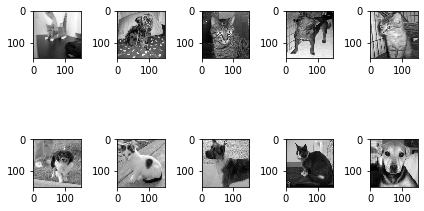

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 데이터 전처리 ###
# raw data
df = pd.read_csv('./data/cat_dog_full.csv')
print('raw data shape : {}'.format(df.shape)) # (2000, 22501)

# column label 이름 붙여주기
df = df.rename(columns={'0': 'label'})
display(df.head())

# # 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values
print(img_data.shape) # (60000, 22500) 150*150

fig = plt.figure()
fig_arr = list()

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(150,150), cmap='gray')

plt.tight_layout()
plt.show()

# train, test 데이터 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'], 
                 test_size=0.3, 
                 random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [15]:
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=256,
                activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,
                activation='sigmoid'))
print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_data_train_norm.reshape(-1,150,150,1),
                    t_data_train,
                    epochs=30,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

{'loss': [0.6924623250961304, 0.6435234546661377, 0.57955002784729, 0.49045833945274353, 0.4411388039588928, 0.3988080620765686, 0.36382949352264404, 0.306145042181015, 0.26115140318870544, 0.23831303417682648, 0.18077130615711212, 0.13510248064994812, 0.1163129210472107, 0.0871739536523819, 0.05318370461463928, 0.03888043016195297, 0.02820892073214054, 0.03869420289993286, 0.024805782362818718, 0.02616705745458603, 0.022872423753142357, 0.022578291594982147, 0.03238750994205475, 0.0243432205170393, 0.017642049118876457, 0.03408330678939819, 0.008327154442667961, 0.04919259250164032, 0.009207958355545998, 0.006796186789870262], 'accuracy': [0.5109329223632812, 0.6320699453353882, 0.7069970965385437, 0.7653061151504517, 0.7886297106742859, 0.8228862881660461, 0.8373177647590637, 0.8683673739433289, 0.891253650188446, 0.8983964920043945, 0.9260932803153992, 0.9473760724067688, 0.9561224579811096, 0.968804657459259, 0.9826530814170837, 0.9867346882820129, 0.9922740459442139, 0.98644316196

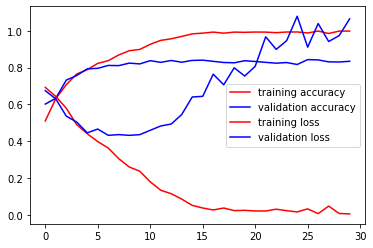

In [16]:
print(history.history)
print(history.history.keys())

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, color='r', label='training accuracy') # label은 범례
plt.plot(val_acc, color='b', label='validation accuracy')
plt.legend()  #  범례 표시
# plt.show() # 15 epochs부터는 validation data가 acc이 증가하지 않음.

plt.plot(train_loss, color='r', label='training loss') # label은 범례
plt.plot(val_loss, color='b', label='validation loss')
plt.legend()  #  범례 표시
plt.show() # 15 epochs부터는 validation loss가 줄지 않고 늘어남 (학습의 의미가 없음.)
# 그래프를 보니 과대적합이 발생하는 것을 알 수 있음!
# 데이터가 적기 때문에 overfitting이 발생할 수 밖에 없는 환경임.